In [3]:
import scipy.io

# Datei laden
data = scipy.io.loadmat("heatcube_0001.mat")

# Alle enthaltenen Variablennamen anzeigen

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'HSI'])


## Reinschauen

In [5]:
HSI = data['HSI']
print("Shape:", HSI.shape)
print("Dtype:", HSI.dtype)
print("Min:", HSI.min(), "Max:", HSI.max())

Shape: (260, 1500, 49)
Dtype: float64
Min: 0.02971271468914074 Max: 0.12882922348753414


## Bild ansehen

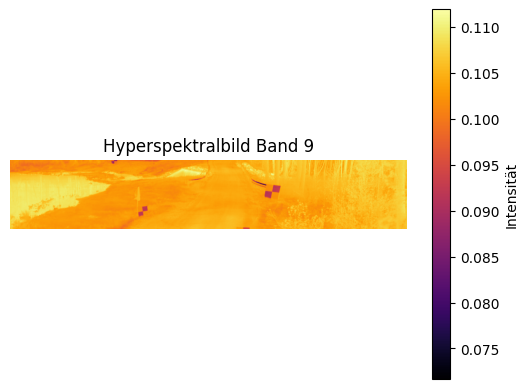

In [13]:
import matplotlib.pyplot as plt

band_index = 9
plt.imshow(HSI[:, :, band_index], cmap='inferno')
plt.title(f"Hyperspektralbild Band {band_index}")
plt.colorbar(label="Intensität")
plt.axis('off')
plt.show()

## Spektrum eines bestimmten Pixels anzeigen

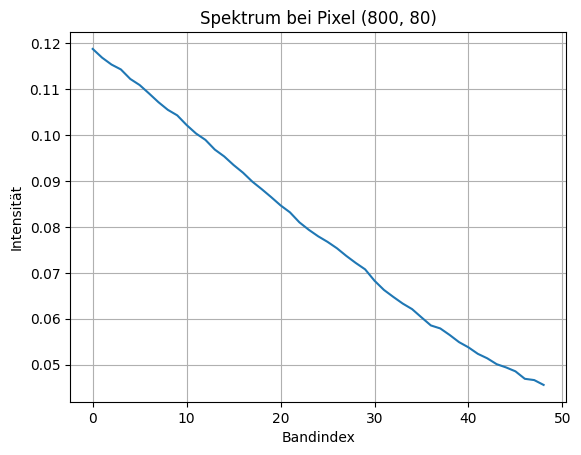

In [26]:
y, x = 80, 800 # Pixel (y, x)
spectrum = HSI[y, x, :]


plt.plot(spectrum) # Ohne Wave
plt.title(f"Spektrum bei Pixel ({x}, {y})")
plt.xlabel("Bandindex")
plt.ylabel("Intensität")
plt.grid(True)
plt.show()

## Fake RGB

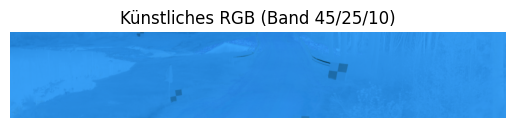

In [17]:
import numpy as np

rgb_fake = np.stack([HSI[:, :, 45], HSI[:, :, 25], HSI[:, :, 10]], axis=2)
rgb_fake = (rgb_fake - rgb_fake.min()) / (rgb_fake.max() - rgb_fake.min()) * 255
rgb_fake = rgb_fake.astype(np.uint8)

plt.imshow(rgb_fake)
plt.title("Künstliches RGB (Band 45/25/10)")
plt.axis('off')
plt.show()

# Material Emissivität 

In [1]:
import scipy.io

# Datei laden
data = scipy.io.loadmat("matLib2.mat")

# Alle enthaltenen Variablennamen anzeigen

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'matLib'])


In [2]:
matLib = data['matLib']
print("Shape:", matLib.shape)
print("Dtype:", matLib.dtype)
print("Min:", matLib.min(), "Max:", matLib.max())

Shape: (252, 6)
Dtype: float64
Min: 0.7106179497695345 Max: 0.9896298929888185


In [6]:
print(f"Shape: {matLib.shape}")
print(f"The first row: {matLib[0]}")

Shape: (252, 6)
The first row: [0.93305548 0.91536599 0.97038946 0.96123958 0.89400235 0.88094997]


# Planck Law

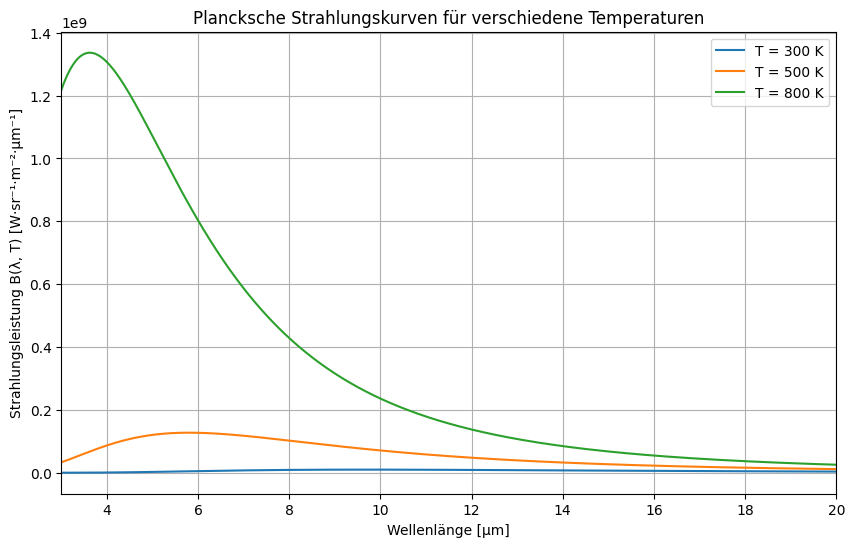

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def planck_law(wavelength_um, T):
    """
    Berechnet die Strahlungsleistung nach dem Planckschen Gesetz.
    wavelength_um: Wellenlänge in µm
    T: Temperatur in Kelvin
    Rückgabe: Strahlungsintensität B(λ, T) [W·sr⁻¹·m⁻²·µm⁻¹]
    """
    h = 6.626e-34  # Planck-Konstante
    c = 3e8        # Lichtgeschwindigkeit
    k = 1.38e-23   # Boltzmann-Konstante
    λ = wavelength_um * 1e-6  # µm → m

    B = (2*h*c**2) / (λ**5) / (np.exp((h*c)/(λ*k*T)) - 1)
    return B

# Wellenlängenbereich für LWIR (z. B. 3–20 µm)
wavelengths = np.linspace(3, 20, 1000)

# Temperaturen (z. B. 300K = Raumtemperatur, 500K = heißes Objekt)
temperatures = [300, 500, 800]

# Plot
plt.figure(figsize=(10, 6))
for T in temperatures:
    B = planck_law(wavelengths, T)
    plt.plot(wavelengths, B, label=f"T = {T} K")

plt.xlabel("Wellenlänge [µm]")
plt.ylabel("Strahlungsleistung B(λ, T) [W·sr⁻¹·m⁻²·µm⁻¹]")
plt.title("Plancksche Strahlungskurven für verschiedene Temperaturen")
plt.grid(True)
plt.legend()
plt.xlim(3, 20)
plt.show()
